In [11]:
import pandas as pd

In [9]:
from prophet import Prophet

In [12]:
df = pd.read_csv("stock.csv")
df = df[["Date","Close"]]
df.columns = ["ds","y"]
print (df)

             ds             y
0    2020-09-26  10754.437500
1    2020-09-27  10774.426758
2    2020-09-28  10721.327148
3    2020-09-29  10848.830078
4    2020-09-30  10787.618164
..          ...           ...
361  2021-09-22  43574.507813
362  2021-09-23  44895.097656
363  2021-09-24  42839.750000
364  2021-09-25  42716.593750
365  2021-09-26  43165.433594

[366 rows x 2 columns]


In [15]:
prophet = Prophet()
prophet.fit(df)
future = prophet.make_future_dataframe(periods=365)
print(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds
0   2020-09-26
1   2020-09-27
2   2020-09-28
3   2020-09-29
4   2020-09-30
..         ...
726 2022-09-22
727 2022-09-23
728 2022-09-24
729 2022-09-25
730 2022-09-26

[731 rows x 1 columns]


In [17]:
forecast= prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
531,2022-03-11,79636.029928,48757.473639,111540.522784
532,2022-03-12,79882.650992,48909.023843,111572.900406
533,2022-03-13,79959.938370,49263.323483,110713.473887
534,2022-03-14,80080.013661,48031.036921,113698.984984
535,2022-03-15,80083.916964,48885.578402,113338.573253
...,...,...,...,...
726,2022-09-22,114605.379357,14743.753874,219333.356773
727,2022-09-23,114922.168065,15976.048764,219074.671144
728,2022-09-24,115168.789129,16228.598062,221566.520869
729,2022-09-25,115246.076506,16856.437145,220205.929445


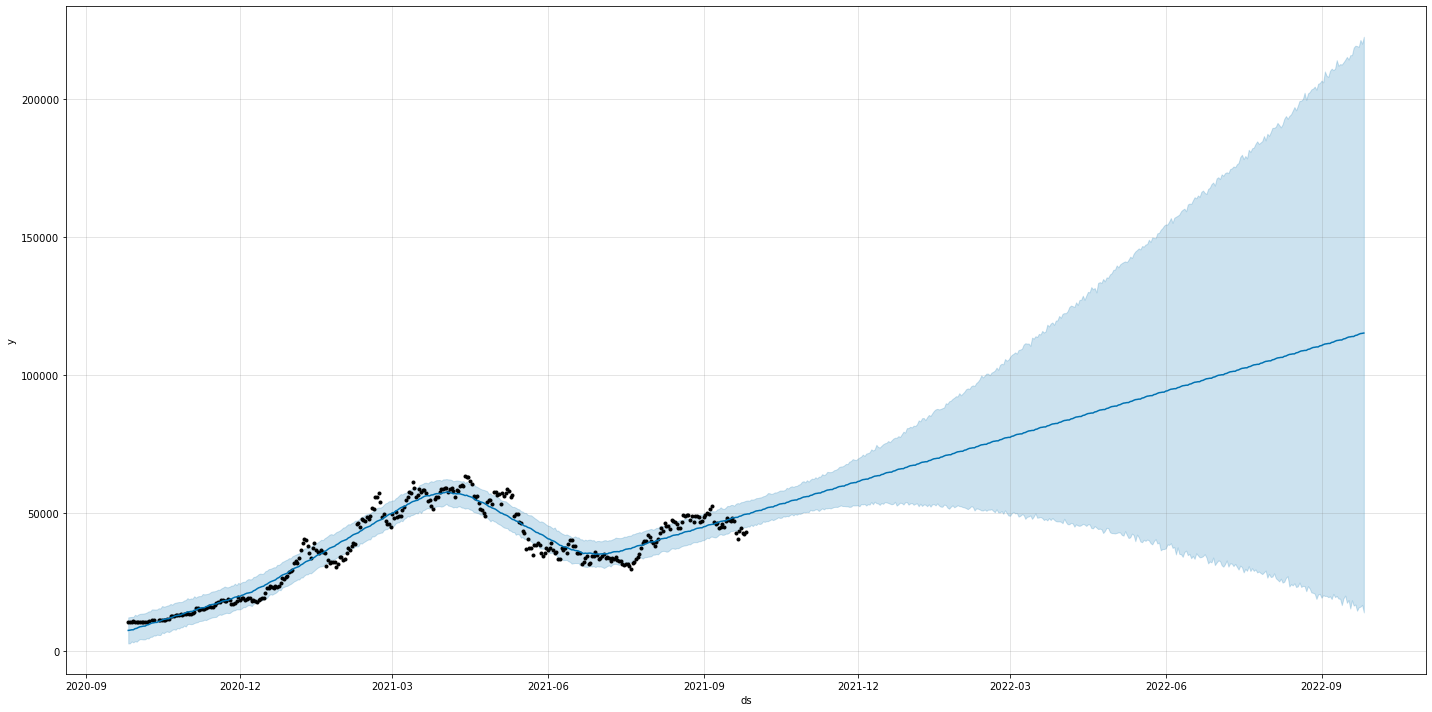

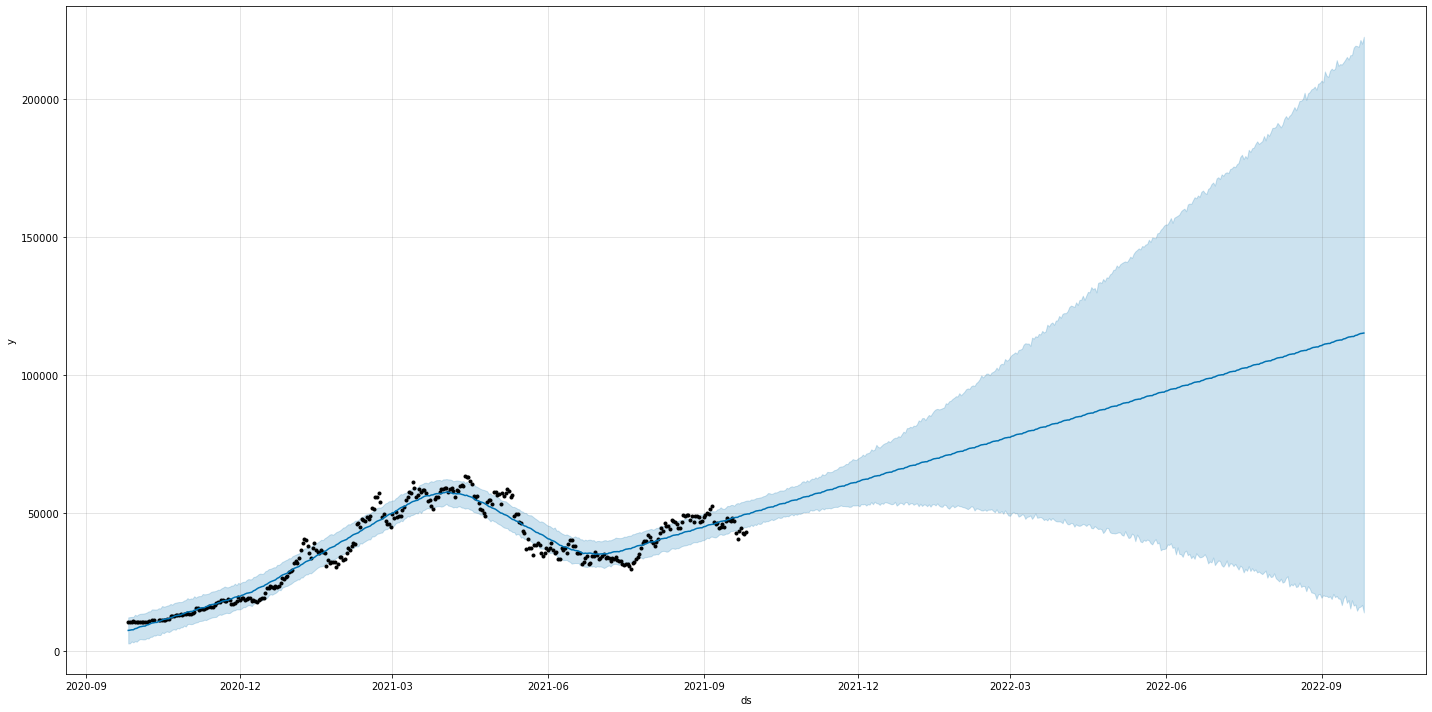

In [22]:
from prophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))